# https://www.youtube.com/watch?v=GyyrnOHwe2E

In [1]:
import numpy as np

import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)

# Print to show there are 1797 labels (integers from 0-9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


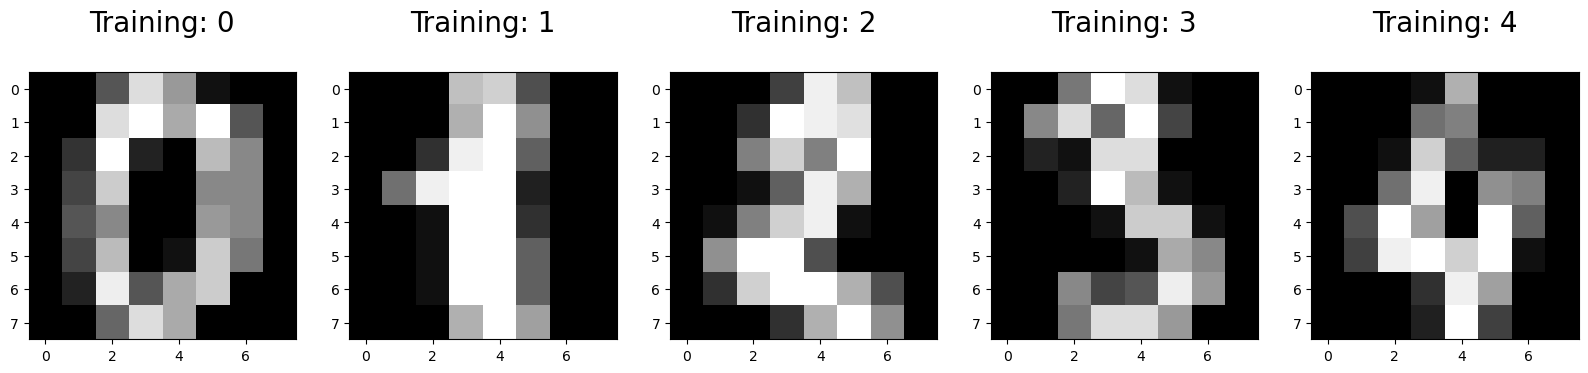

In [3]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [4]:
import pandas as pd 
# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
import struct
# Algorithms
from sklearn import linear_model
from sklearn import manifold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [5]:
# importing the datas
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")
test_df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
l = train_df['label']
l

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [7]:
d=train_df.drop('label', axis=1)
d

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


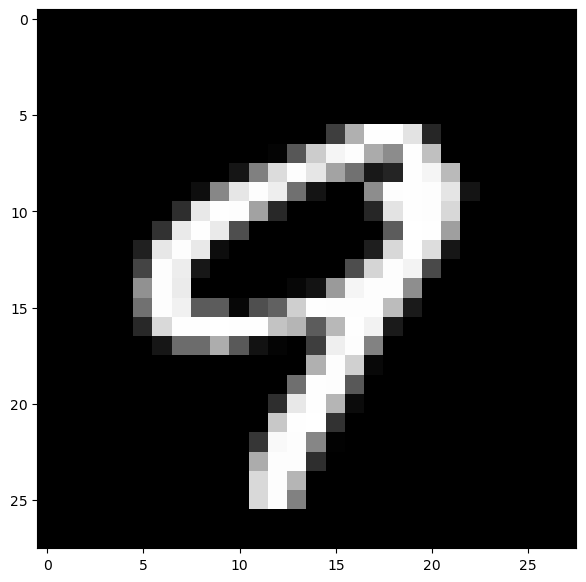

9


In [8]:
plt.figure(figsize=(7,7))
idx=100
grid_data=d.iloc[idx].to_numpy().reshape(28,28)
plt.imshow(grid_data, interpolation = "none", cmap="gray")
plt.show()
print(l[idx])

In [9]:
train_df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
data = fetch_openml("mnist_784", version=1)
print(data)

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel10  ..

In [11]:
x, y = data["data"], data["target"]
print(x.shape)

(70000, 784)


In [12]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.2,
                                                random_state=42)

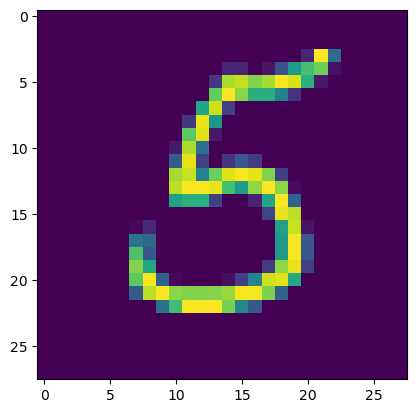

In [13]:
image = np.array(xtrain.iloc[0]).reshape(28, 28)
plt.imshow(image)

In [14]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier()
model.fit(xtrain, ytrain)

SGDClassifier()

In [15]:
predictions = model.predict(xtest)
print(predictions)

['8' '4' '8' ... '8' '7' '1']


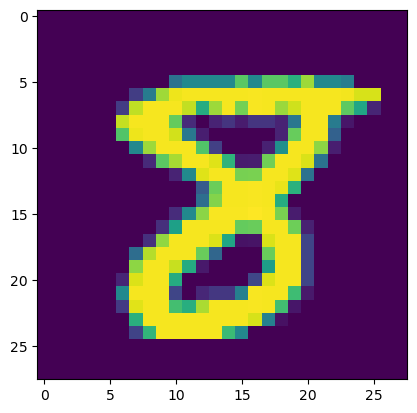

In [16]:
image = np.array(xtest.iloc[0]).reshape(28, 28)
plt.imshow(image)

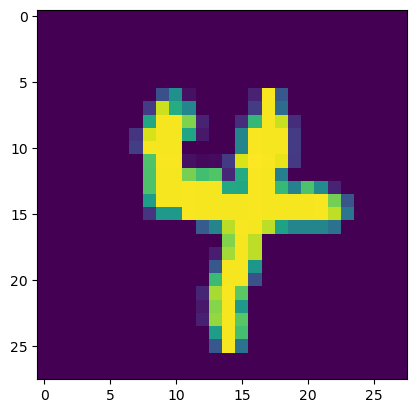

In [17]:
image = np.array(xtest.iloc[1]).reshape(28, 28)
plt.imshow(image)

In [18]:
# importing libraries
import numpy as np
from sklearn.datasets import load_iris 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
#from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

# for visualisation
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from IPython.display import Image  
from subprocess import call

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.2,
                                                random_state=42)
# training a model without pruning
unpruned = DecisionTreeClassifier(max_depth=None, random_state=42)
unpruned.fit(xtrain, ytrain)
print("Performance without pruning:", unpruned.score(xtest, ytest))
print("At depth:", unpruned.tree_.max_depth)

Performance without pruning: 0.8695
At depth: 44


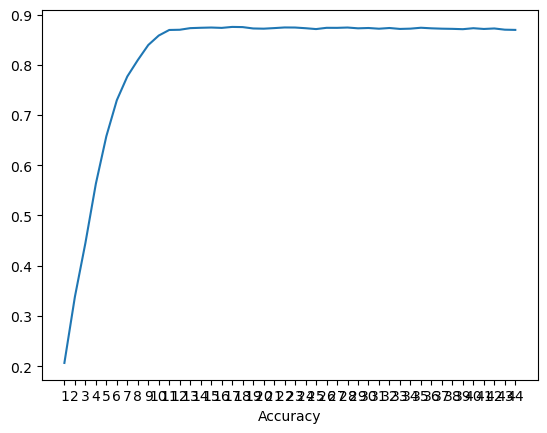

In [19]:
# looking at effect of pruning   
pruned_depths = range(1,unpruned.tree_.max_depth+1)

pruned_scores = [] 
for d in pruned_depths:
  clf = DecisionTreeClassifier(max_depth=d, random_state=42)
  clf.fit(xtrain, ytrain)
  score = clf.score(xtest, ytest)
  pruned_scores.append(score)

fig, ax = plt.subplots()
ax.plot(pruned_depths, pruned_scores)
plt.xlabel("Max_depth values")
plt.xlabel("Accuracy")
ax.xaxis.set_ticks(pruned_depths)
plt.show()

In [20]:
# fitting the chosen tree
best_depth = pruned_depths[np.argmax(pruned_scores)]
print('Best performance reached at depth of:', best_depth)

pruned = DecisionTreeClassifier(max_depth=best_depth)
pruned.fit(x, y)

Best performance reached at depth of: 17


DecisionTreeClassifier(max_depth=17)

In [24]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(xtrain, ytrain)
Y_pred = sgd.predict(xtest)

sgd.score(xtrain, ytrain)

acc_sgd = round(sgd.score(xtrain, ytrain) * 100, 2)

In [25]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(xtrain, ytrain)

Y_prediction = random_forest.predict(xtest)

random_forest.score(xtrain, ytrain)
acc_random_forest = round(random_forest.score(xtrain, ytrain) * 100, 2)

In [26]:
logreg = LogisticRegression()
logreg.fit(xtrain, ytrain)

Y_pred = logreg.predict(xtest)

acc_log = round(logreg.score(xtrain, ytrain) * 100, 2)

C:\Users\Samuel\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
gaussian = GaussianNB() 
gaussian.fit(xtrain, ytrain)
Y_pred = gaussian.predict(xtest)
acc_gaussian = round(gaussian.score(xtrain, ytrain) * 100, 2)

In [28]:
perceptron = Perceptron(max_iter=5)
perceptron.fit(xtrain, ytrain)

Y_pred = perceptron.predict(xtest)

acc_perceptron = round(perceptron.score(xtrain, ytrain) * 100, 2)

C:\Users\Samuel\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [29]:
linear_svc = LinearSVC()
linear_svc.fit(xtrain, ytrain)

Y_pred = linear_svc.predict(xtest)

acc_linear_svc = round(linear_svc.score(xtrain, ytrain) * 100, 2)

C:\Users\Samuel\anaconda\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [30]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(xtrain, ytrain)
Y_pred = decision_tree.predict(xtest)
acc_decision_tree = round(decision_tree.score(xtrain, ytrain) * 100, 2)

In [31]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
100.00,Random Forest
100.00,Decision Tree
93.61,Logistic Regression
88.76,Perceptron
87.43,Stochastic Gradient Decent
86.57,Support Vector Machines
55.24,Naive Bayes


In [32]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, xtrain, ytrain, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.96428571 0.97017857 0.96642857 0.96517857 0.96714286 0.97125
 0.96928571 0.96821429 0.96267857 0.97      ]
Mean: 0.9674642857142857
Standard Deviation: 0.0026723737823614886


In [33]:
importances = pd.DataFrame({'feature':xtrain.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
pixel351,0.010
pixel379,0.009
pixel462,0.008
pixel490,0.008
pixel407,0.008
pixel155,0.008
pixel435,0.008
pixel434,0.007
pixel406,0.007


<AxesSubplot:xlabel='feature'>

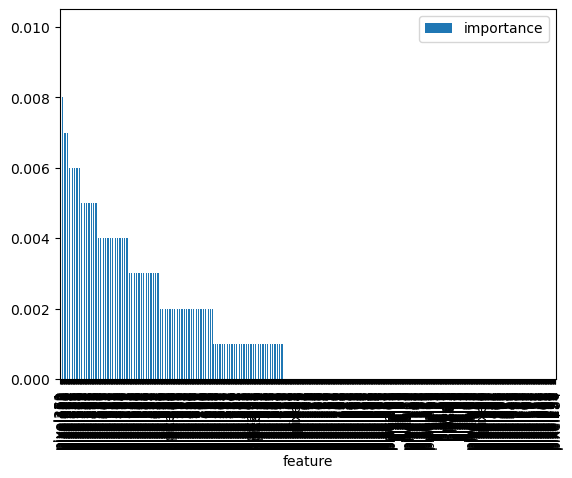

In [34]:
importances.plot.bar()

In [35]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(xtrain, ytrain)
Y_prediction = random_forest.predict(xtest)

random_forest.score(xtrain, ytrain)

acc_random_forest = round(random_forest.score(xtrain, ytrain) * 100, 2)
print(round(acc_random_forest,2,), "%")

100.0 %


In [36]:
print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 96.5 %


In [ ]:
param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10, 25, 50, 70], "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], "n_estimators": [100, 400, 700, 1000, 1500]}
from sklearn.model_selection import GridSearchCV, cross_val_score
rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)
clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)
clf.fit(xtrain, ytrain)
clf.bestparams

In [ ]:
# Random Forest
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(xtrain, ytrain)
Y_prediction = random_forest.predict(xtest)

random_forest.score(xtrain, ytrain)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, xtrain, ytrain, cv=3)
confusion_matrix(ytrain, predictions)